# Hermit Fold 1

In [1]:
import os
from collections import Counter

In [2]:
import pandas as pd

In [3]:
from leaderboard.utils import rasa_utils

In [4]:
import importlib
importlib.reload(rasa_utils)

<module 'leaderboard.utils.rasa_utils' from '/Users/kabu/Documents/workspace/rasa2/leaderboard/utils/rasa_utils.py'>

## Load Data

In [5]:
data_path = "../../../../training-data/public/HERMIT/KFold_1"

In [6]:
!ls {data_path}

test  train


In [7]:
!head {data_path}/train/train.yml

version: "2.0"
nlu:
- intent: alarm_query
  examples: |
    - what alarms do i have set right now
    - checkout [today](date) alarm of meeting
    - report alarm settings
    - see see for me the alarms that you have set [tomorrow](date) [morning](timeofday)
    - is there an alarm for [ten am](time)
    - confirm the alarm time


In [8]:
data = {split: rasa_utils.load_nlu_data(os.path.join(data_path, split, f'{split}.yml')) for split in ['train', 'test']}

/Users/kabu/Documents/workspace/rasa2/rasa/shared/utils/io.py:98: UserWarning: Training data file /Users/kabu/Documents/workspace/training-data/public/HERMIT/KFold_1/train/train.yml has a lower format version than your Rasa Open Source installation: 2.0 < 3.1. Rasa Open Source will read the file as a version 3.1 file. Please update your version key to 3.1. See https://rasa.com/docs/rasa/training-data-format.
/Users/kabu/Documents/workspace/rasa2/rasa/shared/utils/io.py:98: UserWarning: Training data file /Users/kabu/Documents/workspace/training-data/public/HERMIT/KFold_1/test/test.yml has a lower format version than your Rasa Open Source installation: 2.0 < 3.1. Rasa Open Source will read the file as a version 3.1 file. Please update your version key to 3.1. See https://rasa.com/docs/rasa/training-data-format.


In [9]:
dfs = { 
    split: pd.DataFrame(
        [
            { 'text': message.get('text'), 
             'intent' : message.get('intent'), 
             'entities' : [entity['entity'] for entity in message.get('entities',[])],
            }
            for message in data[split].nlu_examples
        ]
    ) for split in data }

## Intents

In [10]:
for split, df in dfs.items():
    print(f'\n{split}\n' + '-'*20)
    display(df['intent'].describe())


train
--------------------


count            9960
unique             64
top       alarm_query
freq              175
Name: intent, dtype: object


test
--------------------


count            1076
unique             64
top       alarm_query
freq               19
Name: intent, dtype: object

<AxesSubplot:>

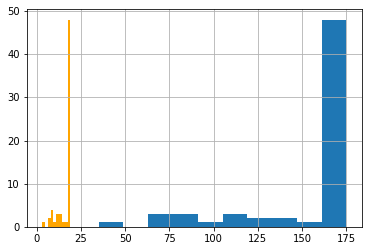

In [11]:
dfs['train']['intent'].value_counts().hist()
dfs['test']['intent'].value_counts().hist(color = "orange")

In [12]:
dfs['train']['intent'].value_counts(ascending=True)[:10]

iot_hue_lighton           35
iot_wemo_on               69
music_settings            70
audio_volume_down         72
datetime_convert          79
email_addcontact          79
iot_wemo_off              89
recommendation_movies     97
alarm_remove             106
general_joke             110
Name: intent, dtype: int64

In [13]:
dfs['train']['intent'].value_counts(ascending=False)[:10]

alarm_query          175
play_radio           175
iot_hue_lightoff     175
lists_createoradd    175
lists_query          175
lists_remove         175
music_query          175
news_query           175
play_audiobook       175
play_game            175
Name: intent, dtype: int64

## Entities

### Entities per Message

In [14]:
for df in dfs.values():
    df['num_entities'] = df['entities'].apply(len)

<AxesSubplot:>

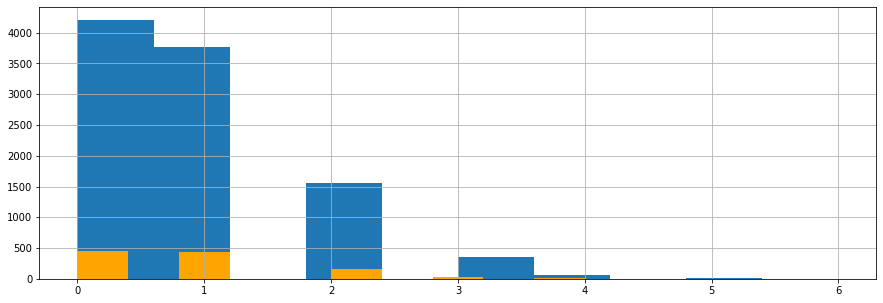

In [15]:
dfs['train']['num_entities'].hist(figsize=(15,5))
dfs['test']['num_entities'].hist(color = "orange")

In [16]:
dfs['train']['num_entities'].value_counts(normalize=True)*100

0    42.248996
1    37.831325
2    15.612450
3     3.524096
4     0.692771
5     0.080321
6     0.010040
Name: num_entities, dtype: float64

In [17]:
dfs['train']['num_entities'].value_counts()

0    4208
1    3768
2    1555
3     351
4      69
5       8
6       1
Name: num_entities, dtype: int64

In [18]:
dfs['test']['num_entities'].value_counts()

0    447
1    431
2    153
3     37
4      8
Name: num_entities, dtype: int64

### Messages per Entity

In [19]:
def count_messages_per_entity(df) -> pd.DataFrame:
    entities_counter = Counter()
    for entities in df['entities']:
        entities_counter.update(entities)

    entities_counter_df = pd.DataFrame.from_dict(entities_counter,orient='index').reset_index()
    entities_counter_df.columns = ['entity', 'message_count']
    entities_counter_df.sort_values('message_count', inplace=True)
    return entities_counter_df

In [20]:
message_per_entity_counts = {split: count_messages_per_entity(df) for split, df in dfs.items()}

<AxesSubplot:>

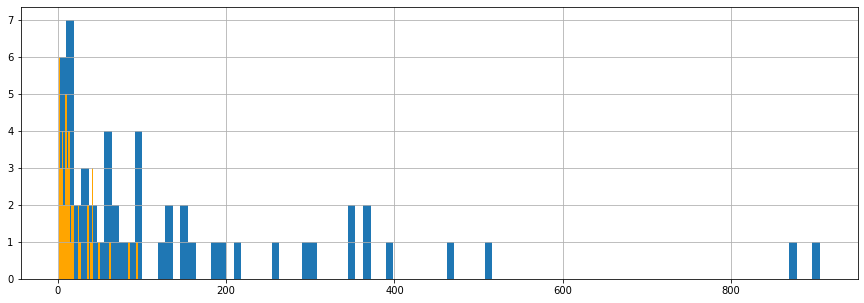

In [21]:
message_per_entity_counts['train']['message_count'].hist(figsize=(15,5), bins=100)
message_per_entity_counts['test']['message_count'].hist(figsize=(15,5), bins=50, color = 'orange')

<AxesSubplot:>

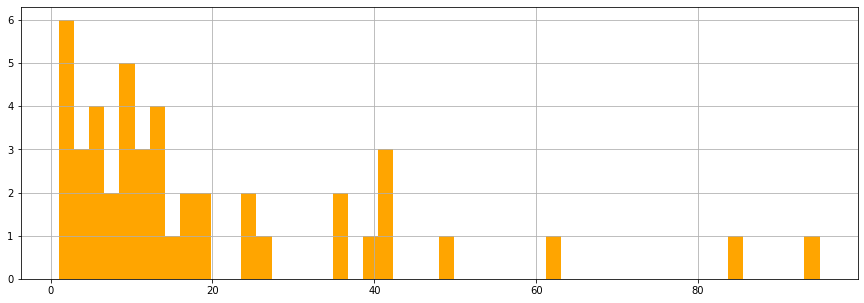

In [22]:
message_per_entity_counts['test']['message_count'].hist(figsize=(15,5), bins=50, color = 'orange')

In [23]:
message_per_entity_counts['train']['message_count'].head(10)

41     1
36     1
19     6
39    10
52    10
20    10
51    11
47    13
3     14
32    17
Name: message_count, dtype: int64

In [24]:
message_per_entity_counts['train']['message_count'].tail(10)

18    302
4     352
5     353
50    363
8     370
16    394
7     468
2     511
11    869
0     905
Name: message_count, dtype: int64

In [25]:
message_per_entity_counts['train']['message_count'].head(10)

41     1
36     1
19     6
39    10
52    10
20    10
51    11
47    13
3     14
32    17
Name: message_count, dtype: int64

In [26]:
message_per_entity_counts['test']['message_count'].tail(10)

36    35
41    35
26    40
8     41
38    41
10    42
4     48
2     62
0     85
13    95
Name: message_count, dtype: int64